In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

### Data analysis

In [2]:
df = pd.read_csv('seattle-weather.csv') # Read in the data

In [3]:
display(df.head())      # Displays first 5 data instances
display(df.sample(5))   # Displays a sample of 5 data instances
display(df.tail())      # Displays last 5 data instances

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


,date,precipitation,temp_max,temp_min,wind,weather
516,2013-05-31,0.0,19.4,11.1,2.5,sun
1265,2015-06-19,0.5,23.9,13.3,3.2,rain
1234,2015-05-19,0.0,21.7,11.7,2.6,sun
720,2013-12-21,5.6,8.9,5.6,2.3,rain
1121,2015-01-26,0.0,16.1,6.1,2.2,fog


,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [4]:
display(df.describe()) # Describe the data

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


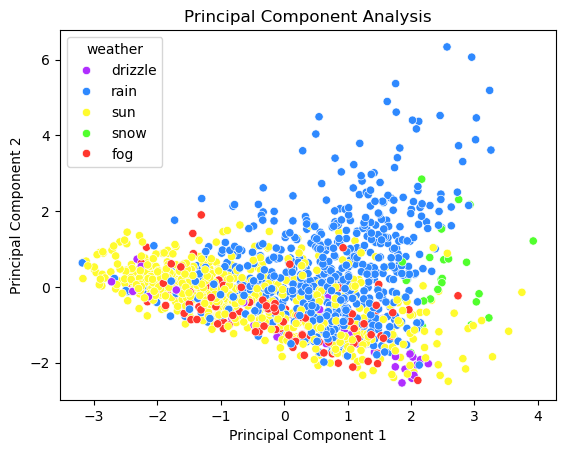

In [5]:
# Useful variables to have for later
column_names = ['precipitation', 'temp_max', 'temp_min', 'wind']
class_mapping = [x for x in df['weather'].unique()]
custom_palette = {'drizzle': '#b02eff', 'rain': '#2e89ff', 'sun': '#fffb2e', 'snow': '#51ff2e', 'fog': '#ff372e'}

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df[column_names])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)

# Create a new DataFrame with PC1 and PC2
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['weather'] = df['weather']

# Scatterplot of PC1 and PC2
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='weather', palette=custom_palette)
plt.title("Principal Component Analysis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [6]:
display(df['weather'].value_counts()) # Count the number of instances for each class in our label column

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

### Data preprocessing

In [7]:
df.drop(columns=['date'], axis=1, inplace=True) # Drop the date column

In [8]:
# Apply Synthetic Minority Oversampling Technique to fix imbalanced data
smote = SMOTE() # https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
X_smote, y_smote = smote.fit_resample(df[column_names], df['weather'])

In [9]:
X_scaled = scaler.fit_transform(X_smote) # Scale the data with the standard scaler
df = pd.DataFrame(data=X_scaled, columns=column_names) # Overwrite the dataframe with the newly scaled data
df['weather'] = y_smote

In [10]:
features = df.drop(columns=['weather']) # Extracts the feature columns
label = df['weather'] # Extracts the label column

### Data preprocessing - analysis

In [11]:
display(df.head())      # Displays first 5 data instances
display(df.sample(5))   # Displays a sample of 5 data instances
display(df.tail())      # Displays last 5 data instances

,precipitation,temp_max,temp_min,wind,weather
0,-0.487872,-0.191751,-0.252996,1.082515,drizzle
1,1.312598,-0.468099,-0.642196,0.940622,rain
2,-0.355727,-0.329925,0.136204,-0.620200,rain
3,2.865296,-0.267119,-0.146850,1.082515,rain
4,-0.273137,-0.681640,-0.642196,2.075766,rain


,precipitation,temp_max,temp_min,wind,weather
2971,2.835692,-0.535607,-0.402483,1.862926,snow
192,-0.487872,1.692436,1.215349,-0.194521,fog
1666,-0.487872,1.396821,1.109336,-0.710351,drizzle
558,-0.487872,0.637291,1.215349,-0.691147,sun
2872,-0.314018,-1.185484,-0.951875,2.592468,snow


,precipitation,temp_max,temp_min,wind,weather
3200,0.623649,-0.585403,-0.814832,-0.345543,snow
3201,1.844059,-1.055144,-0.612787,0.795177,snow
3202,0.672951,-1.183382,-1.031395,1.426090,snow
3203,0.265712,-1.121506,-1.123533,1.089175,snow
3204,-0.487872,1.387292,1.475538,-0.910343,sun


In [12]:
display(df.describe()) # Describe the data

,precipitation,temp_max,temp_min,wind
count,3.205000e+03,3.205000e+03,3.205000e+03,3.205000e+03
mean,1.773586e-17,1.773586e-17,1.773586e-17,-2.660378e-17
std,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00
min,-4.878716e-01,-2.000571e+00,-2.393595e+00,-1.968183e+00
25%,-4.878716e-01,-8.350532e-01,-9.429409e-01,-7.620932e-01
50%,-4.878716e-01,-1.289450e-01,-5.839593e-02,-2.654679e-01
75%,5.722461e-02,8.170183e-01,8.775211e-01,6.568363e-01
max,8.745727e+00,2.672213e+00,2.099894e+00,4.487946e+00


In [13]:
display(df['weather'].value_counts()) # Count the number of instances for each class in our label column

weather
drizzle    641
rain       641
sun        641
snow       641
fog        641
Name: count, dtype: int64

### Data visualization

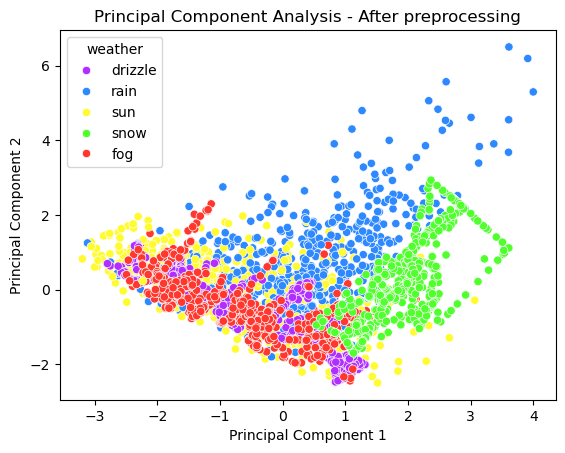

In [14]:
principal_components = pca.fit_transform(features)

# Create a new DataFrame with PC1 and PC2
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['weather'] = df['weather']

# Scatterplot of PC1 and PC2
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='weather', palette=custom_palette)
plt.title("Principal Component Analysis - After preprocessing")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

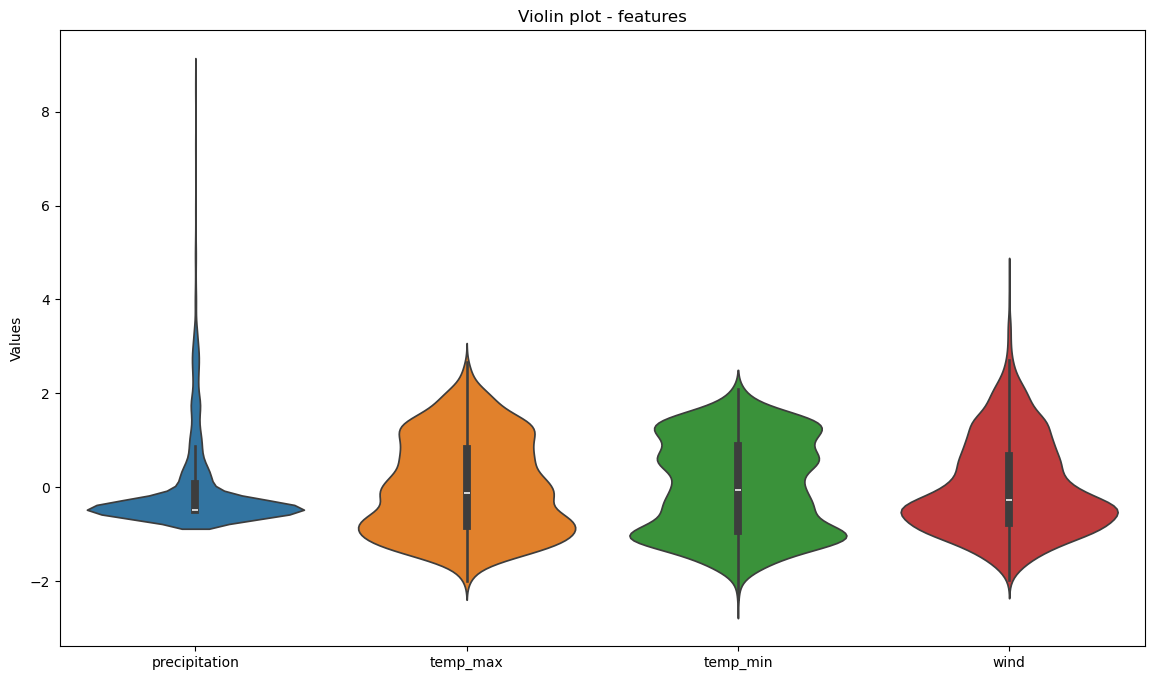

In [15]:
# Violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=features)
plt.title("Violin plot - features")
plt.ylabel("Values")
plt.show()

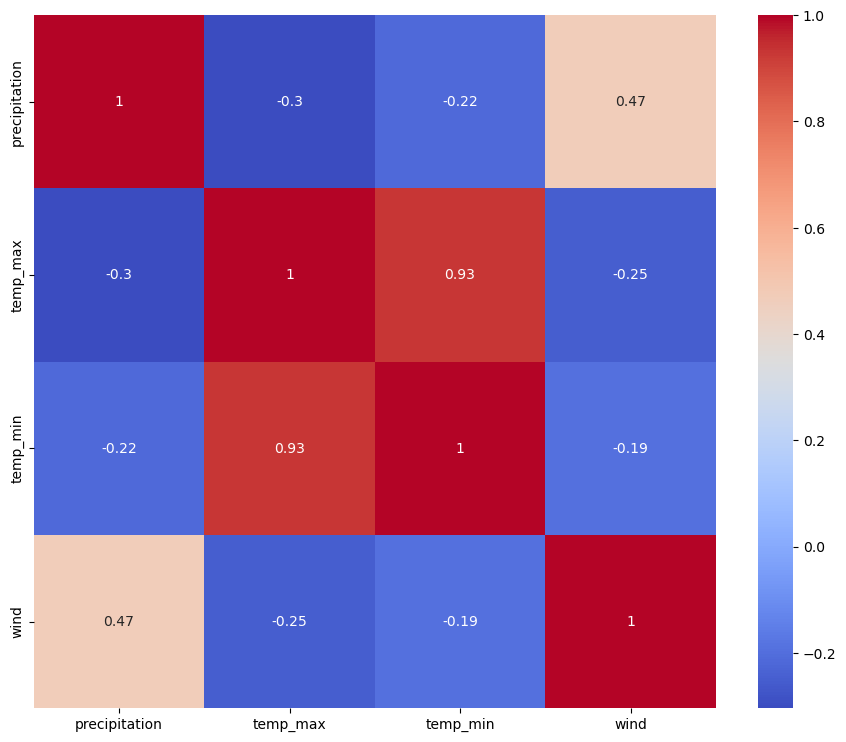

In [16]:
# Correlation Heatmap
plt.figure(figsize=(11, 9))
sns.heatmap(data=features.corr(), annot=True, cmap='coolwarm')
plt.show()

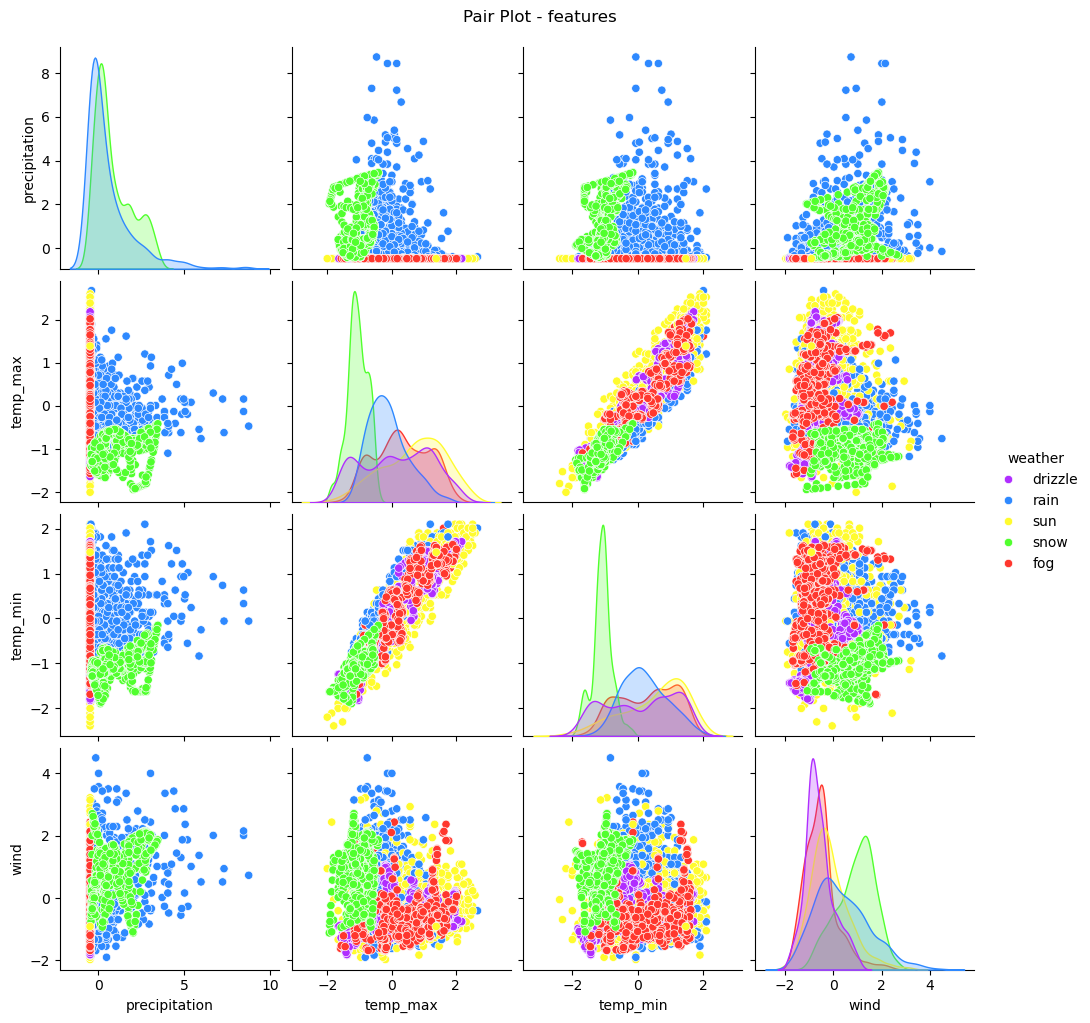

In [17]:
# Pair plot
sns.pairplot(df, hue='weather', diag_kind='kde', palette=custom_palette)
plt.suptitle('Pair Plot - features', y=1.02)
plt.show()

### Machine learning

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2) # Split the data into training and testing sets

In [19]:
model_identity = MLPClassifier(activation='identity', max_iter=500) # Create the 1st model
model_tanh = MLPClassifier(activation='tanh', max_iter=500)         # Create the 2nd model
model_relu = MLPClassifier(activation='relu', max_iter=500)         # Create the 3rd model

In [20]:
# Fits the models
model_identity.fit(X_train, y_train)
model_tanh.fit(X_train, y_train)
model_relu.fit(X_train, y_train)
print("Done!")

Done!


### Machine learning - analysis

In [21]:
# Predicts the training and testing for all 3 models
y_train_pred_identity = model_identity.predict(X_train)
y_test_pred_identity = model_identity.predict(X_test)
y_train_pred_tanh = model_tanh.predict(X_train)
y_test_pred_tanh = model_tanh.predict(X_test)
y_train_pred_relu = model_relu.predict(X_train)
y_test_pred_relu = model_relu.predict(X_test)

In [22]:
# Creates dataframes of the actual and predicted training/testing data
train_result_identity = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_identity})
test_result_identity = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_identity})
train_result_tanh = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_tanh})
test_result_tanh = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_tanh})
train_result_relu = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_relu})
test_result_relu = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_relu})

# Calculates confusion matrices
cm_train_identity = confusion_matrix(y_train, y_train_pred_identity)
cm_test_identity = confusion_matrix(y_test, y_test_pred_identity)
cm_train_tanh = confusion_matrix(y_train, y_train_pred_tanh)
cm_test_tanh = confusion_matrix(y_test, y_test_pred_tanh)
cm_train_relu = confusion_matrix(y_train, y_train_pred_relu)
cm_test_relu = confusion_matrix(y_test, y_test_pred_relu)

# Gets all sensitivities
sensitivities = pd.DataFrame(columns=class_mapping)
for cm in (cm_train_identity, cm_test_identity, cm_train_tanh, cm_test_tanh, cm_train_relu, cm_test_relu):
    sensitivity = []
    for i in range(len(cm)):
        true_positives = cm[i][i]
        false_negatives = sum(cm[i][j] for j in range(len(cm)) if j != i)
        sensitivity.append(true_positives / (true_positives + false_negatives))
    sensitivities.loc[len(sensitivities)] = sensitivity

# Gets all specificities
specificities = pd.DataFrame(columns=class_mapping)
for cm in (cm_train_identity, cm_test_identity, cm_train_tanh, cm_test_tanh, cm_train_relu, cm_test_relu):
    specificity = []
    for i in range(len(cm)):
        true_negatives = sum(cm[j][j] for j in range(len(cm)) if j != i)
        false_positives = sum(cm[j][i] for j in range(len(cm)) if j != i)
        specificity.append(true_negatives / (true_negatives + false_positives))
    specificities.loc[len(specificities)] = specificity

#### 1st model's report

In [23]:
print("Identity Activation - Training Scores:")
print(f"Accuracy:\t{accuracy_score(y_train, y_train_pred_identity)}")
print("Sensitivities:")
for x, y in zip(sensitivities.iloc[0].keys(), sensitivities.iloc[0].values):
    print(f"    {x}:\t{y}")
print("Specificities:")
for x, y in zip(specificities.iloc[0].keys(), specificities.iloc[0].values):
    print(f"    {x}:\t{y}")
print(f"Precision:\t{precision_score(y_train, y_train_pred_identity, average='weighted')}")
print(f"Recall:\t\t{recall_score(y_train, y_train_pred_identity, average='weighted')}")
print(f"F1-score:\t{f1_score(y_train, y_train_pred_identity, average='weighted')}")
print(f"Log Loss:\t{log_loss(y_train, model_identity.predict_proba(X_train))}")

Identity Activation - Training Scores:
Accuracy:	0.6193447737909517
Sensitivities:
    drizzle:	0.4187380497131931
    rain:	0.3110236220472441
    sun:	0.826
    snow:	0.962890625
    fog:	0.5854126679462572
Specificities:
    drizzle:	0.8153662894580107
    rain:	0.8552631578947368
    sun:	0.9824414715719063
    snow:	0.9563318777292577
    fog:	0.7842298288508558
Precision:	0.6237652075361504
Recall:		0.6193447737909517
F1-score:	0.618097015844325
Log Loss:	0.7914983329523178


In [24]:
print("Identity Activation - Testing Scores:")
print(f"Accuracy:\t{accuracy_score(y_test, y_test_pred_identity)}")
print("Sensitivities:")
for x, y in zip(sensitivities.iloc[1].keys(), sensitivities.iloc[1].values):
    print(f"    {x}:\t{y}")
print("Specificities:")
for x, y in zip(specificities.iloc[1].keys(), specificities.iloc[1].values):
    print(f"    {x}:\t{y}")
print(f"Precision:\t{precision_score(y_test, y_test_pred_identity, average='weighted')}")
print(f"Recall:\t\t{recall_score(y_test, y_test_pred_identity, average='weighted')}")
print(f"F1-score:\t{f1_score(y_test, y_test_pred_identity, average='weighted')}")
print(f"Log Loss:\t{log_loss(y_test, model_identity.predict_proba(X_test))}")

Identity Activation - Testing Scores:
Accuracy:	0.625585023400936
Sensitivities:
    drizzle:	0.4576271186440678
    rain:	0.2556390977443609
    sun:	0.851063829787234
    snow:	0.9302325581395349
    fog:	0.6083333333333333
Specificities:
    drizzle:	0.7940503432494279
    rain:	0.8843373493975903
    sun:	0.9689655172413794
    snow:	0.9493243243243243
    fog:	0.8078817733990148
Precision:	0.6290780715458164
Recall:		0.625585023400936
F1-score:	0.6208453116281453
Log Loss:	0.7647719552057832


In [25]:
print("Identity Activation - Training comparison:")
display(train_result_identity.sample(5))
print("Identity Activation - Testing comparison:")
display(test_result_identity.sample(5))

Identity Activation - Training comparison:


,Actual,Predicted
2580,fog,fog
1752,drizzle,drizzle
763,sun,drizzle
2921,snow,snow
2446,fog,fog


Identity Activation - Testing comparison:


,Actual,Predicted
3072,snow,snow
997,rain,rain
1940,drizzle,sun
361,rain,rain
1355,rain,rain


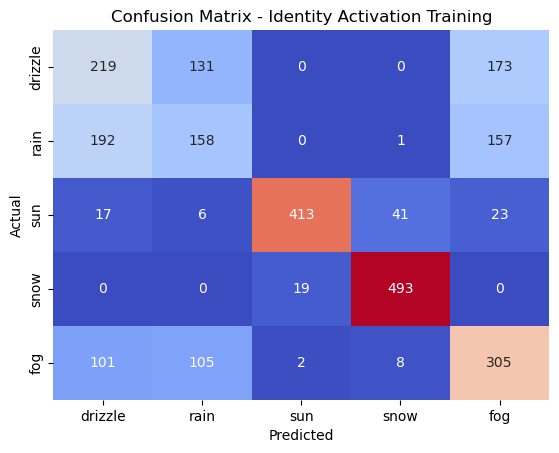

In [26]:
sns.heatmap(cm_train_identity, annot=True, fmt="d", cmap='coolwarm', cbar=False, xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Identity Activation Training")
plt.show()

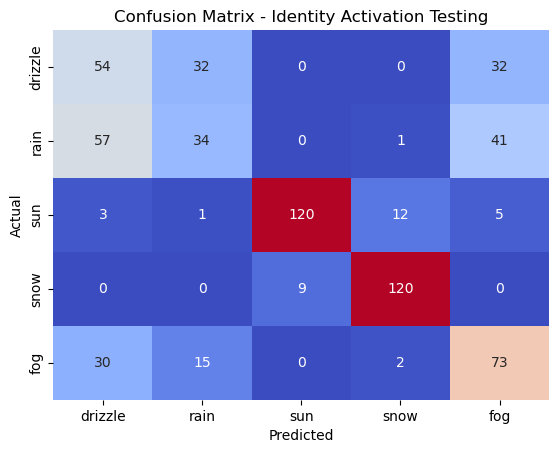

In [27]:

sns.heatmap(cm_test_identity, annot=True, fmt="d", cmap='coolwarm', cbar=False, xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Identity Activation Testing")
plt.show()

#### 2nd model's report

In [28]:
print("Tanh Activation - Training Scores:")
print(f"Accuracy:\t{accuracy_score(y_train, y_train_pred_tanh)}")
print("Sensitivities:")
for x, y in zip(sensitivities.iloc[2].keys(), sensitivities.iloc[2].values):
    print(f"    {x}:\t{y}")
print("Specificities:")
for x, y in zip(specificities.iloc[2].keys(), specificities.iloc[2].values):
    print(f"    {x}:\t{y}")
print(f"Precision:\t{precision_score(y_train, y_train_pred_tanh, average='weighted')}")
print(f"Recall:\t\t{recall_score(y_train, y_train_pred_tanh, average='weighted')}")
print(f"F1-score:\t{f1_score(y_train, y_train_pred_tanh, average='weighted')}")
print(f"Log Loss:\t{log_loss(y_train, model_tanh.predict_proba(X_train))}")

Tanh Activation - Training Scores:
Accuracy:	0.6942277691107644
Sensitivities:
    drizzle:	0.4588910133843212
    rain:	0.5984251968503937
    sun:	0.86
    snow:	0.974609375
    fog:	0.5892514395393474
Specificities:
    drizzle:	0.8974358974358975
    rain:	0.8353140916808149
    sun:	0.9904622157006603
    snow:	0.9756283320639756
    fog:	0.8441260744985674
Precision:	0.7035880069407743
Recall:		0.6942277691107644
F1-score:	0.6958206399064745
Log Loss:	0.6748225502956261


In [29]:
print("Tanh Activation - Testing Scores:")
print(f"Accuracy:\t{accuracy_score(y_test, y_test_pred_tanh)}")
print("Sensitivities:")
for x, y in zip(sensitivities.iloc[3].keys(), sensitivities.iloc[3].values):
    print(f"    {x}:\t{y}")
print("Specificities:")
for x, y in zip(specificities.iloc[3].keys(), specificities.iloc[3].values):
    print(f"    {x}:\t{y}")
print(f"Precision:\t{precision_score(y_test, y_test_pred_tanh, average='weighted')}")
print(f"Recall:\t\t{recall_score(y_test, y_test_pred_tanh, average='weighted')}")
print(f"F1-score:\t{f1_score(y_test, y_test_pred_tanh, average='weighted')}")
print(f"Log Loss:\t{log_loss(y_test, model_tanh.predict_proba(X_test))}")

Tanh Activation - Testing Scores:
Accuracy:	0.7098283931357254
Sensitivities:
    drizzle:	0.4661016949152542
    rain:	0.5338345864661654
    sun:	0.8865248226950354
    snow:	0.9767441860465116
    fog:	0.65
Specificities:
    drizzle:	0.9029345372460497
    rain:	0.8458149779735683
    sun:	0.9880239520958084
    snow:	0.9791666666666666
    fog:	0.8587699316628702
Precision:	0.7158996835433208
Recall:		0.7098283931357254
F1-score:	0.7108447602578483
Log Loss:	0.6492236702597707


In [30]:
print("Tanh Activation - Training comparison:")
display(train_result_tanh.sample(5))
print("Tanh Activation - Testing comparison:")
display(test_result_tanh.sample(5))

Tanh Activation - Training comparison:


,Actual,Predicted
1300,rain,rain
2846,snow,snow
977,fog,sun
2062,fog,fog
259,sun,sun


Tanh Activation - Testing comparison:


,Actual,Predicted
1355,rain,rain
444,rain,rain
911,sun,sun
2499,fog,drizzle
246,sun,sun


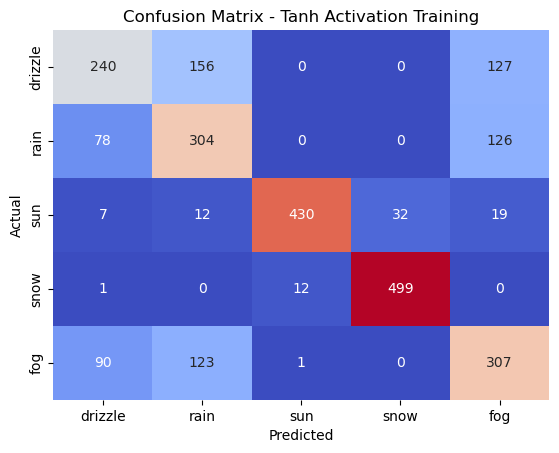

In [31]:
sns.heatmap(cm_train_tanh, annot=True, fmt="d", cmap='coolwarm', cbar=False, xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tanh Activation Training")
plt.show()

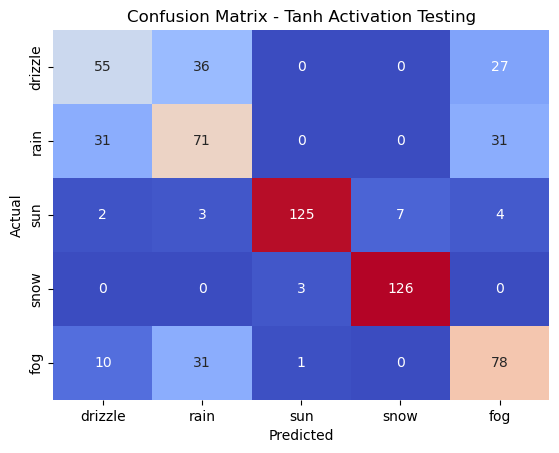

In [32]:
sns.heatmap(cm_test_tanh, annot=True, fmt="d", cmap='coolwarm', cbar=False, xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tanh Activation Testing")
plt.show()

#### 3rd model's report

In [33]:
print("Relu Activation - Training Scores:")
print(f"Accuracy:\t{accuracy_score(y_train, y_train_pred_relu)}")
print("Sensitivities:")
for x, y in zip(sensitivities.iloc[2].keys(), sensitivities.iloc[2].values):
    print(f"    {x}:\t{y}")
print("Specificities:")
for x, y in zip(specificities.iloc[2].keys(), specificities.iloc[2].values):
    print(f"    {x}:\t{y}")
print(f"Precision:\t{precision_score(y_train, y_train_pred_relu, average='weighted')}")
print(f"Recall:\t\t{recall_score(y_train, y_train_pred_relu, average='weighted')}")
print(f"F1-score:\t{f1_score(y_train, y_train_pred_relu, average='weighted')}")
print(f"Log Loss:\t{log_loss(y_train, model_relu.predict_proba(X_train))}")

Relu Activation - Training Scores:
Accuracy:	0.7445397815912637
Sensitivities:
    drizzle:	0.4588910133843212
    rain:	0.5984251968503937
    sun:	0.86
    snow:	0.974609375
    fog:	0.5892514395393474
Specificities:
    drizzle:	0.8974358974358975
    rain:	0.8353140916808149
    sun:	0.9904622157006603
    snow:	0.9756283320639756
    fog:	0.8441260744985674
Precision:	0.7511126311688794
Recall:		0.7445397815912637
F1-score:	0.7466867823470288
Log Loss:	0.599368815484719


In [34]:
print("Relu Activation - Testing Scores:")
print(f"Accuracy:\t{accuracy_score(y_test, y_test_pred_relu)}")
print("Sensitivities:")
for x, y in zip(sensitivities.iloc[3].keys(), sensitivities.iloc[3].values):
    print(f"    {x}:\t{y}")
print("Specificities:")
for x, y in zip(specificities.iloc[3].keys(), specificities.iloc[3].values):
    print(f"    {x}:\t{y}")
print(f"Precision:\t{precision_score(y_test, y_test_pred_relu, average='weighted')}")
print(f"Recall:\t\t{recall_score(y_test, y_test_pred_relu, average='weighted')}")
print(f"F1-score:\t{f1_score(y_test, y_test_pred_relu, average='weighted')}")
print(f"Log Loss:\t{log_loss(y_test, model_relu.predict_proba(X_test))}")

Relu Activation - Testing Scores:
Accuracy:	0.7581903276131046
Sensitivities:
    drizzle:	0.4661016949152542
    rain:	0.5338345864661654
    sun:	0.8865248226950354
    snow:	0.9767441860465116
    fog:	0.65
Specificities:
    drizzle:	0.9029345372460497
    rain:	0.8458149779735683
    sun:	0.9880239520958084
    snow:	0.9791666666666666
    fog:	0.8587699316628702
Precision:	0.764454930067779
Recall:		0.7581903276131046
F1-score:	0.7606982949315416
Log Loss:	0.5872464254959496


In [35]:
print("Relu Activation - Training comparison:")
display(train_result_relu.sample(5))
print("Relu Activation - Testing comparison:")
display(test_result_relu.sample(5))

Relu Activation - Training comparison:


,Actual,Predicted
2064,fog,fog
2952,snow,snow
2443,fog,fog
2136,fog,sun
941,sun,sun


Relu Activation - Testing comparison:


,Actual,Predicted
2038,drizzle,drizzle
1394,rain,rain
2432,fog,sun
1801,drizzle,drizzle
2669,snow,snow


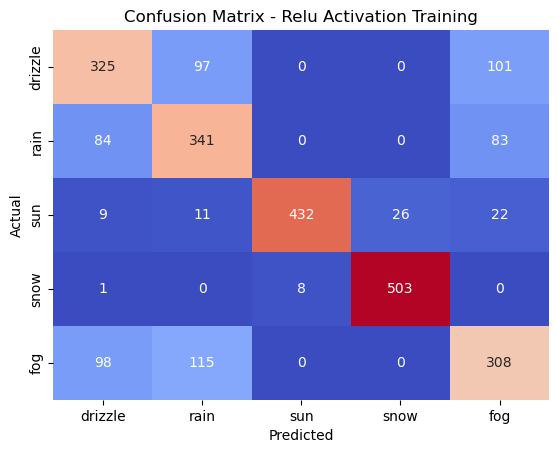

In [36]:
sns.heatmap(cm_train_relu, annot=True, fmt="d", cmap='coolwarm', cbar=False, xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Relu Activation Training")
plt.show()

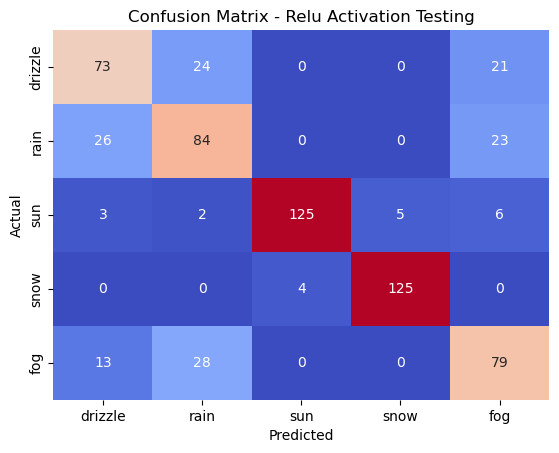

In [37]:
sns.heatmap(cm_test_relu, annot=True, fmt="d", cmap='coolwarm', cbar=False, xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Relu Activation Testing")
plt.show()

### End of assignment